/Users/sourguyxian/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Total n (Manual) = 116
Total n (Actual) = 116
Cool, ns are equal.
[28, 25, 22, 41]
[15, 15, 12, 15]
[13, 10, 10, 26]
[7, 6, 9, 18]
[10, 13, 6, 14]
[11, 6, 7, 9]
[4, 3, 4, 8]
[6, 8, 4, 6]
[5, 4, 4, 1]
[3, 3, 5, 10]
[4, 5, 2, 8]
[6, 2, 3, 8]


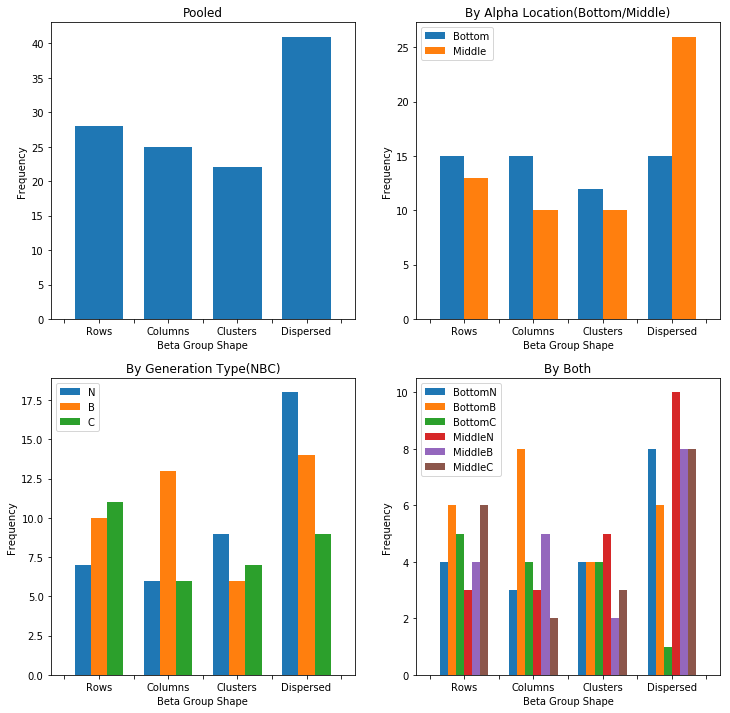

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import random
# execfile('Imports.py')
# import Modules.Funcs as funcs
%matplotlib inline

#pd.set_option('precision', 2)

# import data
con = sqlite3.connect('../data/experiment.db')
info = pd.read_sql_query("SELECT condition,gentype,participant from participants", con)
df = pd.read_sql_query("SELECT * from generation", con)
alphas = pd.read_sql_query("SELECT * from alphas", con)
stimuli = pd.read_sql_query("SELECT * from stimuli", con).as_matrix()



data = {'condition':'','gentype':0}
gentypeStr = ['N','B','C'] #not alpha, only beta, beta-gamma
gentypeStrDisp = ['A\'','B','C'] #not alpha, only beta, beta

#info_new = info.copy()
info['gentypeStr'] = [gentypeStr[row.gentype] for i,row in info.iterrows()]
info['cond_comb'] = [row.condition+gentypeStr[row.gentype] for i,row in info.iterrows()]#info.copy().condition + info.copy().gentype.astype(str)

#eyeballed betagroups
betagroups = ['Rows','Columns','Clusters','Dispersed']
#Manual entry of eyeballed betagroup
manual = dict(zip(betagroups,[[] for _ in range(len(betagroups))]))
manual['Rows'] = [144,115,18,117,121,186,134,145,54,124,40,127,114,77,49,116,153,120,73,42,47,143,89,141,166,16,46,70]
manual['Columns'] = [28,58,26,64,62,33,104,147,68,177,150,180,39,78,30,82,86,151,110,69,29,20,161,101,91]
manual['Clusters'] = [55,95,59,87,148,97,23,169,149,103,185,99,93,123,19,106,85,126,25,81,74,100]
manual['Dispersed'] = [57,172,75,108,112,72,140,158,184,139,160,154,138,79,21,98,136,43,56,181,61,178,135,163,48,60,22,132,173,36,80,50,159,182,96,71,119,65,131,165,90]
total_len = 0
manual_arr = []
#Convert to array
for group in manual.keys():
    #Remove accidental duplicates
    arr_list = list(np.unique(np.array(manual[group])))    
    total_len += len(arr_list)
    for arr_el in arr_list:
        manual_arr += [[arr_el, group]]
        
#Merge into new dataframe
manual_pd = pd.DataFrame(columns=('participant','betagroup'),data = manual_arr)
info_merge = pd.merge(info.copy(),manual_pd,on='participant',how='left')

print('Total n (Manual) = ' + str(total_len))
print('Total n (Actual) = ' + str(len(info)))
if total_len == len(info):
    print('Cool, ns are equal.')
else:
    print('Looks like ns are not equal.')
    #Check for where participants might not be assigned a betagroup
    print([row['participant']  for i,row in info_merge.iterrows() if type(row['betagroup']) != str])

#Build histogram
fig,axs = plt.subplots(2,2,figsize=(12,12))
plotnames = ['Pooled','By Alpha Location(Bottom/Middle)','By Generation Type(NBC)', 'By Both']
conditions = [[], ['condition'],['gentypeStr'],['cond_comb']]
cond_levels_all = [[None],['Bottom','Middle'],gentypeStr,['BottomN','BottomB','BottomC','MiddleN','MiddleB','MiddleC']]
# info_merge['betagroup','condition']
space = .3

for i,split in enumerate(plotnames):
    ax = axs.ravel()[i]
    groupcond = ['betagroup']+conditions[i]
    data_pd = info_merge.groupby(groupcond).participant.count()
    cond_levels = cond_levels_all[i]
#     if i>0:
#         cond_levels = list(np.unique(info_merge[conditions[i]]))
#     else:
#         cond_levels = [None]
    nlevels = len(cond_levels)
    xlim = range(1,len(betagroups)+1)
    for ci, cgrp in enumerate(cond_levels):
        width = (1 - space) / (len(cond_levels))
        bary = []
        for bi,bgrp in enumerate(betagroups):
            if cgrp is None:
                bary += [data_pd[bgrp]]
            else:
                bary += [data_pd[bgrp][cgrp]]                
        #barx = [j - (1 - space) / 2. + ci * width for j in range(1,len(betagroups)+1)]
#         if len(cond_levels) % 2 == 0:  #check if even
#             adj_units = len(cond_levels)
#             bar_mid_i = [np.floor((len(cond_levels))/2),np.ceil(len(cond_levels)/2)-1]
#             bar_mid = ((xlim[int(bar_mid_i[0])] *width) + (xlim[int(bar_mid_i[1])] + width))/2 - width/2 
#         else:             #check if odd
#             bar_mid_i = [(len(cond_levels)+1)/2-1]
#             bar_mid = (xlim[bar_mid_i[0]] * width) - width/2 
        barx = [j - width*(len(cond_levels)-1)/2 + ci * width for j in xlim]
#         print(bary)
        ax.bar(barx,bary,width=width)                

    ###Need to figure out hist heights
    
    #     if conditions[i] is None:
    #         data = list(info_merge.betagroup.as_matrix())
    #     else:
    #         data_raw = info_merge.groupby(conditions[i]).participant.count()
    #     data = list(info_merge.betagroup.as_matrix())
    ax.set_title(split)
    ax.set_xlim(min(xlim)-(1-space),max(xlim)+(1-space))
    ax.set_xlabel('Beta Group Shape')
    ax.set_ylabel('Frequency')
    xlabstring = [''] * (len(betagroups) * 2)
    xlabstring[1::2] = betagroups
    ax.set_xticklabels([''] + xlabstring)
    if i>0:
        ax.legend(cond_levels,loc='upper left')

# fig.savefig('eyeball_hist.png', bbox_inches='tight', transparent=False)

In [4]:
bary

[6, 2, 3, 8]

[134, 82, 185, 159]


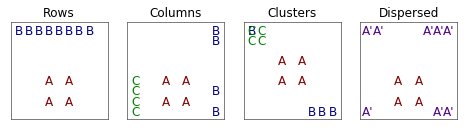

In [312]:
#Plot some samples
gentypeCols = [[.3,0,.5],[0,0,.5],[0,.5,0]]
pids = [random.choice(manual[grp]) for grp in betagroups]#[134,150,148,112]
print pids
fig,axs = plt.subplots(1,len(pids),figsize=(8,3))
for i,pid in enumerate(pids):
    ax = axs[i]
    info_p = info.loc[info.participant==pid]
    condition,gentype = info_p.condition.as_matrix()[0],info_p.gentype.as_matrix()[0]
    palphas = alphas[condition]
    pbetas = df.stimulus[df.participant == pid]
    titlestr = betagroups[i]
    if gentype==2:
        pdf = df.loc[df.participant==pid]
        betastr = [gentypeStrDisp[1] if pdf_row.category=='Beta' else gentypeStrDisp[2] for ii,\
pdf_row in pdf.iterrows() ]
        betacol = [gentypeCols[1] if pdf_row.category=='Beta' else gentypeCols[2] for ii,pdf_ro\
w in pdf.iterrows() ]
    else:
        betastr = gentypeStrDisp[gentype]
        betacol = gentypeCols[gentype]
    
    funcs.plotclasses(ax, stimuli, palphas, pbetas, betastr=betastr,betacol = betacol)
    ax.set_title(titlestr)

In [284]:
condition = info.loc[info.participant==pid].condition.as_matrix()[0]
print condition


Bottom


In [132]:
info_merge.groupby(['betagroup']+['condition']).participant.count()['Clusters']['Bottom']

12

In [44]:
plt.bar([0,1,2],[[1,2],[3,3],[0,3]])

Alpha     int64
Beta     object
dtype: object
   Alpha Beta
0      2    2
1      3    1
   Alpha Beta Gamma
0      2    2    hi
1      3    1   his
   Alpha Gamma Theta
0      2    hi   hi2
1      3   his  his1


In [186]:
    xlabstring = [''] * (len(betagroups) * 2)
    xlabstring[1::2] = betagroups
    print xlabstring

['', 'Rows', '', 'Columns', '', 'Clusters', '', 'Dispersed']


In [205]:
[j - (1 - space) / 2. + 1 * width for j in range(1,len(betagroups)+1)]

[0.7666666666666667,
 1.7666666666666666,
 2.7666666666666666,
 3.7666666666666666]

In [180]:
zip(betagroups,['' for _ in range(len(betagroups))])

[('Rows', ''), ('Columns', ''), ('Clusters', ''), ('Dispersed', '')]

In [196]:
[j - (1 - space) / 2. + 1 * width for j in range(1,len(betagroups)+1)]

0.11666666666666665

In [204]:
space, width

(0.3, 0.11666666666666665)

In [216]:
max([1,2,3,4])

4

In [245]:
bar_mid_i[0]

2.0

In [247]:
bar_mid

3.583333333333333